# nba_dataset
[kaggle link](https://www.kaggle.com/datasets/wyattowalsh/basketball?resource=download)
"Daily Updated SQLite Database — 64,000+ Games, 4800+ Players, and 30 Teams 🏀"

This dataset provides a collection of sqlite and .csv files. For this work we will use only the **.csv**. The sqlite is updated in real time, but as discussed in the proposal we will focus season-wise so we will only need files from last season and earlier.

Description and usage of the files:
 - common_player_info - detailed info about all the players (team, height, name...)
 - ~~draft_combine_history - info of drafted players~~ <font color="red">**UNUSED**</font>
 - ~~draft_history - player drafted~~ <font color="red">**UNUSED**</font>
 - game - details and stats about everygame in the NBA 
 - ~~game_info - other info about games~~ <font color="red">**UNUSED**</font>
 - ~~game_summary - information about periods and broadcast~~ <font color="red">**UNUSED**</font>
 - ~~inactive_players - players retired~~ <font color="red">**UNUSED**</font>
 - line_score - points per game and others
 - ~~officials~~<font color="red">**UNUSED**</font>
 - other_stats - stats  per game of rebounds, turnovers...
 - ~~play_by_play - description of a play in each game~~ <font color="red">**UNUSED**</font>
 - player - simple description of players
 - team - simple list of league teams
 - ~~team_details - Details about the team's history and organization~~ <font color="red">**UNUSED**</font>
 - ~~team_history - year of foundation of all teams that were in the nba once~~ <font color="red">**UNUSED**</font>
 - team_info_common - stats of the team per year



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Eduardo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def missing(df):
    missing_value_df = df.isnull().sum()
    print(missing_value_df)

    raw_percent_missing_value = 100*(missing_value_df / len(df.index))
    percent_missing_value = round(raw_percent_missing_value,2)
    print(percent_missing_value.sort_values(ascending=False))

    percent_missing_value.plot(kind='barh')
    plt.figure(figsize=(10,6))
    sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25)

## EDA

### Common player info

In [3]:
common_player_info = pd.read_csv('nba_dataset/csv/common_player_info.csv')
print(common_player_info.shape)
common_player_info.head(3)

(2457, 33)


,person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09 00:00:00,Louisiana State,USA,...,mahmoud_abdul-rauf,1990.0,2000.0,N,Y,Y,1990,1,3,N
1,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,...,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N
2,76007,John,Abramovic,John Abramovic,"Abramovic, John",J. Abramovic,john-abramovic,1919-02-09 00:00:00,Salem,USA,...,HISTADD_brooms_abramovic,1946.0,1947.0,N,Y,Y,Undrafted,Undrafted,Undrafted,N


Drop columns and inactive players

In [4]:
common_player_info.drop(common_player_info.columns[[5,6,8,10,13,16,17,21,23,26,27,28,29,30,31,32]], axis=1, inplace=True)

common_player_info = common_player_info[common_player_info['to_year']>1980]
print(common_player_info.shape)
common_player_info.head(3)

(1752, 17)


,person_id,first_name,last_name,display_first_last,display_last_comma_first,birthdate,country,height,weight,jersey,position,team_id,team_name,team_abbreviation,team_city,from_year,to_year
0,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",1969-03-09 00:00:00,USA,6-1,162.0,1,Guard,1610612743,Nuggets,DEN,Denver,1990.0,2000.0
1,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",1974-11-03 00:00:00,France,6-6,235.0,9,Forward-Guard,1610612758,Kings,SAC,Sacramento,1997.0,2003.0
3,203112,Quincy,Acy,Quincy Acy,"Acy, Quincy",1990-10-06 00:00:00,USA,6-7,240.0,NaN,Forward,0,NaN,NaN,NaN,2012.0,2018.0


Check for nan

person_id                     0
first_name                    0
last_name                     0
display_first_last            0
display_last_comma_first      0
birthdate                     0
country                       0
height                       38
weight                       38
jersey                      426
position                     20
team_id                       0
team_name                   413
team_abbreviation           413
team_city                   413
from_year                     0
to_year                       0
dtype: int64
jersey                      24.32
team_city                   23.57
team_abbreviation           23.57
team_name                   23.57
weight                       2.17
height                       2.17
position                     1.14
from_year                    0.00
team_id                      0.00
person_id                    0.00
first_name                   0.00
country                      0.00
birthdate                    0.00
d

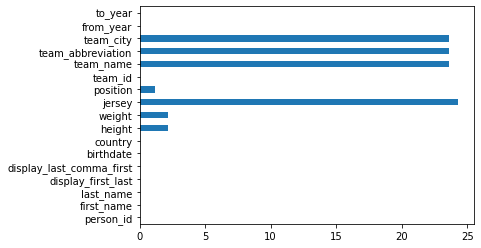

<Figure size 720x432 with 0 Axes>

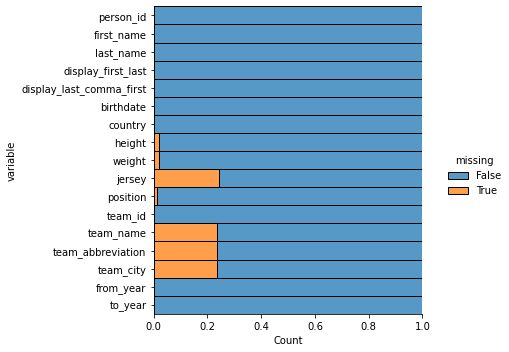

In [5]:
missing(common_player_info)

### Team

For this we will only drop the year_founded since it is irrelevant to the app. Notthin else will be changed as the data is complete. This table is usefull for the team id, as it matches in every other table of the dataset.

In [6]:
team = pd.read_csv("nba_dataset/csv/team.csv")
team.drop(['year_founded'], axis=1, inplace=True)
print(team.info())
team.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30 non-null     int64 
 1   full_name     30 non-null     object
 2   abbreviation  30 non-null     object
 3   nickname      30 non-null     object
 4   city          30 non-null     object
 5   state         30 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.5+ KB
None


,id,full_name,abbreviation,nickname,city,state
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio


### team_info_common

In [7]:
team_info_common = pd.read_csv("nba_dataset/csv/team_info_common.csv")
print(team_info_common.info())
team_info_common.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_id            27 non-null     int64  
 1   season_year        27 non-null     object 
 2   team_city          27 non-null     object 
 3   team_name          27 non-null     object 
 4   team_abbreviation  27 non-null     object 
 5   team_conference    27 non-null     object 
 6   team_division      27 non-null     object 
 7   team_code          27 non-null     object 
 8   team_slug          27 non-null     object 
 9   w                  27 non-null     int64  
 10  l                  27 non-null     int64  
 11  pct                27 non-null     float64
 12  conf_rank          27 non-null     int64  
 13  div_rank           27 non-null     int64  
 14  min_year           27 non-null     int64  
 15  max_year           27 non-null     int64  
 16  league_id          27 non-nu

,team_id,season_year,team_city,team_name,team_abbreviation,team_conference,team_division,team_code,team_slug,w,...,league_id,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg
0,1610612737,2022-23,Atlanta,Hawks,ATL,East,Southeast,hawks,hawks,32,...,0,22022,7,117.0,12,43.7,20,24.6,21,116.9
1,1610612738,2022-23,Boston,Celtics,BOS,East,Atlantic,celtics,celtics,45,...,0,22022,4,117.7,6,45.2,7,26.3,9,112.4
2,1610612739,2022-23,Cleveland,Cavaliers,CLE,East,Central,cavaliers,cavaliers,40,...,0,22022,25,112.0,23,41.7,18,24.9,1,106.4


In [8]:
team_info_common.drop(team_info_common.columns[[4,7,8,14,15,16]], axis=1, inplace=True)
team_info_common.head(3)

,team_id,season_year,team_city,team_name,team_conference,team_division,w,l,pct,conf_rank,div_rank,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg
0,1610612737,2022-23,Atlanta,Hawks,East,Southeast,32,32,0.500,8,2,22022,7,117.0,12,43.7,20,24.6,21,116.9
1,1610612738,2022-23,Boston,Celtics,East,Atlantic,45,20,0.692,2,1,22022,4,117.7,6,45.2,7,26.3,9,112.4
2,1610612739,2022-23,Cleveland,Cavaliers,East,Central,40,26,0.606,4,2,22022,25,112.0,23,41.7,18,24.9,1,106.4


In [9]:
team_id1 = team['id']
team_id2 = team_info_common['team_id']

id = np.setdiff1d(team_id1, team_id2)

print('teams that are not in this table: {}'.format(team[team['id'].isin(id)]['full_name'].to_numpy()) )

teams that are not in this table: ['Toronto Raptors' 'Utah Jazz' 'Memphis Grizzlies']


Since this refers to the latest season and we want to focus on a full season, we will not use this table

### Game

In [10]:
game = pd.read_csv("nba_dataset/csv/game.csv")
print(game.info())
game.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62339 entries, 0 to 62338
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season_id               62339 non-null  int64  
 1   team_id_home            62339 non-null  int64  
 2   team_abbreviation_home  62339 non-null  object 
 3   team_name_home          62339 non-null  object 
 4   game_id                 62339 non-null  int64  
 5   game_date               62339 non-null  object 
 6   matchup_home            62339 non-null  object 
 7   wl_home                 62332 non-null  object 
 8   min                     62339 non-null  int64  
 9   fgm_home                62321 non-null  float64
 10  fga_home                44477 non-null  float64
 11  fg_pct_home             44438 non-null  float64
 12  fg3m_home               46686 non-null  float64
 13  fg3a_home               41422 non-null  float64
 14  fg3_pct_home            41063 non-null

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,2,0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51,-5,0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,-6,0


Drop columns and old games (change date to other format)

In [11]:
game.drop(game.columns[[2,3,28,30,31,53]], axis=1, inplace=True)


In [12]:
import datetime

#game['game_date'].str.split('-')
#self.df["date"] = pd.to_datetime(self.df["date"]).dt.date

game['game_date'] = pd.to_datetime(game['game_date'], dayfirst=True)
mask = (game['game_date'] > '1981-07-01')
game = game.loc[mask]
game.shape

(44818, 48)

season_id             0
team_id_home          0
game_id               0
game_date             0
matchup_home          0
wl_home               7
min                   0
fgm_home              0
fga_home            768
fg_pct_home         769
fg3m_home             0
fg3a_home          3418
fg3_pct_home       3755
ftm_home              0
fta_home              0
ft_pct_home           1
oreb_home          3693
dreb_home          3751
reb_home            789
ast_home            797
stl_home           3610
blk_home           3401
tov_home           3430
pf_home              39
pts_home              0
plus_minus_home       0
team_id_away          0
matchup_away          0
wl_away               7
fgm_away              0
fga_away            768
fg_pct_away         769
fg3m_away             0
fg3a_away          3418
fg3_pct_away       3667
ftm_away              0
fta_away              0
ft_pct_away           1
oreb_away          3693
dreb_away          3750
reb_away            785
ast_away        

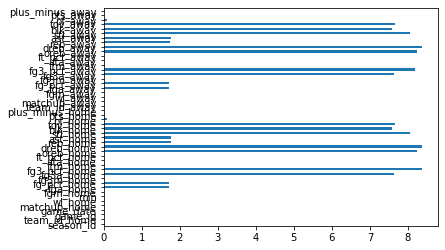

<Figure size 720x432 with 0 Axes>

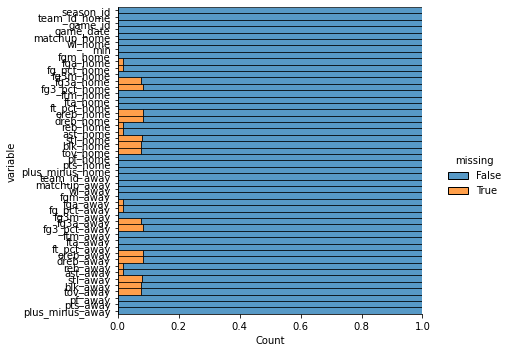

In [13]:
missing(game)

### other_stats

This data adds to some of the games registed in the games .csv file. This data is 3 times smaller than that dataframe.

In [14]:
other_stats = pd.read_csv("nba_dataset/csv/other_stats.csv")
other_stats.info()
other_stats.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27781 entries, 0 to 27780
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   league_id               27781 non-null  int64  
 1   team_id_home            27781 non-null  int64  
 2   team_abbreviation_home  27781 non-null  object 
 3   team_city_home          27781 non-null  object 
 4   pts_paint_home          27781 non-null  int64  
 5   pts_2nd_chance_home     27781 non-null  int64  
 6   pts_fb_home             27781 non-null  int64  
 7   largest_lead_home       27781 non-null  int64  
 8   lead_changes            27781 non-null  int64  
 9   times_tied              27781 non-null  int64  
 10  team_turnovers_home     27781 non-null  int64  
 11  total_turnovers_home    27687 non-null  float64
 12  team_rebounds_home      25881 non-null  float64
 13  pts_off_to_home         25601 non-null  float64
 14  team_id_away            27781 non-null

,league_id,team_id_home,team_abbreviation_home,team_city_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,...,team_abbreviation_away,team_city_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,0,1610612745,HOU,Houston,44,16,20,25,8,3,...,SAC,Sacramento,38,9,12,2,0,27.0,11.0,NaN
1,0,1610612748,MIA,Miami,32,15,14,16,0,0,...,ATL,Atlanta,32,9,6,0,1,24.0,7.0,NaN
2,0,1610612753,ORL,Orlando,38,25,3,18,4,6,...,WAS,Washington,48,9,20,5,0,16.0,13.0,NaN


In [15]:
other_stats['pts_off_to_away'].unique()

array([nan, 19.,  0., 12., 21., 22., 28., 13., 20., 15., 34., 18., 14.,
       23., 32., 17.,  9., 24., 16., 11.,  7., 25., 10.,  8., 41., 26.,
       33.,  4.,  6., 29., 27.,  2., 30.,  5.,  3., 31., 37., 39., 38.,
       36., 35., 40.,  1., 47., 43., 42., 44.])

In [16]:
other_stats.drop(other_stats.columns[[0,2,3,15,16]], axis=1, inplace=True)
other_stats.head(3)

,team_id_home,pts_paint_home,pts_2nd_chance_home,pts_fb_home,largest_lead_home,lead_changes,times_tied,team_turnovers_home,total_turnovers_home,team_rebounds_home,pts_off_to_home,team_id_away,pts_paint_away,pts_2nd_chance_away,pts_fb_away,largest_lead_away,team_turnovers_away,total_turnovers_away,team_rebounds_away,pts_off_to_away
0,1610612745,44,16,20,25,8,3,2,23.0,14.0,NaN,1610612758,38,9,12,2,0,27.0,11.0,NaN
1,1610612748,32,15,14,16,0,0,1,19.0,6.0,NaN,1610612737,32,9,6,0,1,24.0,7.0,NaN
2,1610612753,38,25,3,18,4,6,1,17.0,8.0,NaN,1610612764,48,9,20,5,0,16.0,13.0,NaN


team_id_home               0
pts_paint_home             0
pts_2nd_chance_home        0
pts_fb_home                0
largest_lead_home          0
lead_changes               0
times_tied                 0
team_turnovers_home        0
total_turnovers_home      94
team_rebounds_home      1900
pts_off_to_home         2180
team_id_away               0
pts_paint_away             0
pts_2nd_chance_away        0
pts_fb_away                0
largest_lead_away          0
team_turnovers_away        0
total_turnovers_away      94
team_rebounds_away      1900
pts_off_to_away         2180
dtype: int64
pts_off_to_home         7.85
pts_off_to_away         7.85
team_rebounds_away      6.84
team_rebounds_home      6.84
total_turnovers_away    0.34
total_turnovers_home    0.34
pts_2nd_chance_home     0.00
pts_paint_away          0.00
team_turnovers_away     0.00
largest_lead_away       0.00
pts_fb_away             0.00
pts_2nd_chance_away     0.00
team_id_away            0.00
pts_fb_home             0.00
p

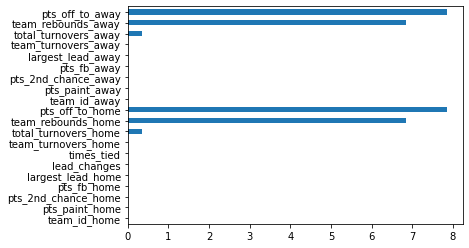

<Figure size 720x432 with 0 Axes>

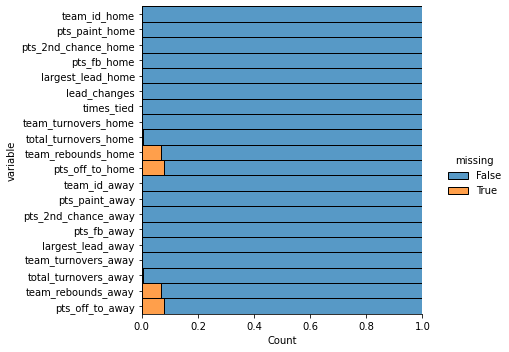

In [17]:
missing(other_stats)

The number of missing values seems to match with the columns that they appear so we choose to drop the rows with the values missing

In [18]:
other_stats.dropna(axis=0, how='any', inplace=True)
other_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23701 entries, 17 to 27780
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team_id_home          23701 non-null  int64  
 1   pts_paint_home        23701 non-null  int64  
 2   pts_2nd_chance_home   23701 non-null  int64  
 3   pts_fb_home           23701 non-null  int64  
 4   largest_lead_home     23701 non-null  int64  
 5   lead_changes          23701 non-null  int64  
 6   times_tied            23701 non-null  int64  
 7   team_turnovers_home   23701 non-null  int64  
 8   total_turnovers_home  23701 non-null  float64
 9   team_rebounds_home    23701 non-null  float64
 10  pts_off_to_home       23701 non-null  float64
 11  team_id_away          23701 non-null  int64  
 12  pts_paint_away        23701 non-null  int64  
 13  pts_2nd_chance_away   23701 non-null  int64  
 14  pts_fb_away           23701 non-null  int64  
 15  largest_lead_away 

Since the rows did not have the whole info, the new dataframe has no problems

### line_score

In [19]:
line_score = pd.read_csv("nba_dataset/csv/line_score.csv")
print(line_score.info())
line_score.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60768 entries, 0 to 60767
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_date_est           60768 non-null  object 
 1   game_sequence           31583 non-null  float64
 2   game_id                 60768 non-null  int64  
 3   team_id_home            60768 non-null  int64  
 4   team_abbreviation_home  60768 non-null  object 
 5   team_city_name_home     60768 non-null  object 
 6   team_nickname_home      60768 non-null  object 
 7   team_wins_losses_home   60768 non-null  object 
 8   pts_qtr1_home           59665 non-null  float64
 9   pts_qtr2_home           59654 non-null  float64
 10  pts_qtr3_home           59616 non-null  float64
 11  pts_qtr4_home           59615 non-null  float64
 12  pts_ot1_home            31340 non-null  float64
 13  pts_ot2_home            29997 non-null  float64
 14  pts_ot3_home            29799 non-null

,game_date_est,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,...,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
0,1946-11-01 00:00:00,NaN,24600001,1610610035,HUS,Toronto,Huskies,-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
1,1946-11-02 00:00:00,NaN,24600003,1610610034,BOM,St. Louis,Bombers,-,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
2,1946-11-02 00:00:00,NaN,24600002,1610612738,BOS,Boston,Celtics,-,10.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59


In [20]:
line_score['game_date_est'] = pd.to_datetime(line_score['game_date_est'], dayfirst=True)
mask = (line_score['game_date_est'] > '1981-07-01')
line_score = line_score.loc[mask]
line_score.shape

(43655, 43)

many lines seem to be missing values so we check that first

game_date_est                 0
game_sequence             12724
game_id                       0
team_id_home                  0
team_abbreviation_home        0
team_city_name_home           0
team_nickname_home            0
team_wins_losses_home         0
pts_qtr1_home                 0
pts_qtr2_home                 0
pts_qtr3_home                 0
pts_qtr4_home                 0
pts_ot1_home              13156
pts_ot2_home              13774
pts_ot3_home              13879
pts_ot4_home              13891
pts_ot5_home              32165
pts_ot6_home              32166
pts_ot7_home              32166
pts_ot8_home              32166
pts_ot9_home              32166
pts_ot10_home             32166
pts_home                      0
team_id_away                  0
team_abbreviation_away        0
team_city_name_away           0
team_nickname_away            0
team_wins_losses_away         0
pts_qtr1_away                 0
pts_qtr2_away                 0
pts_qtr3_away                 0
pts_qtr4

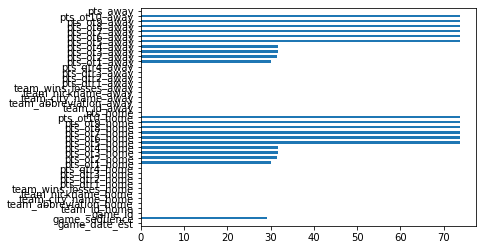

<Figure size 720x432 with 0 Axes>

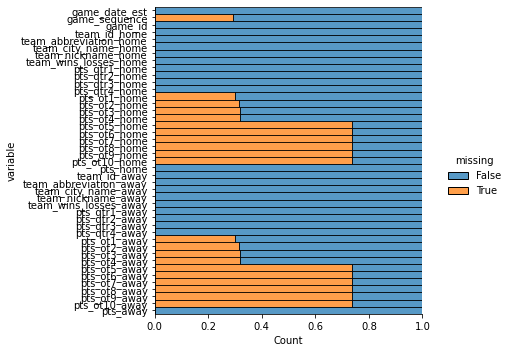

In [21]:
missing(line_score)

In [22]:
line_score['game_sequence'].unique()

array([nan,  1.,  3.,  2., 12.,  6.,  7., 10., 14.,  4., 11.,  5.,  8.,
        9., 13.,  0., 15.])

The ot columns are irrelevant for the visualization so they will be dropped ,so as the game_sequence

In [23]:
line_score.drop(line_score.columns[[1,4,5,6,12,13,14,15,16,17,18,19,20,21,
                                    24,25,26,32,33,34,35,36,37,38,39,40,41]], axis=1, inplace=True)
line_score.head(3)

,game_date_est,game_id,team_id_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,pts_qtr3_home,pts_qtr4_home,pts_home,team_id_away,team_wins_losses_away,pts_qtr1_away,pts_qtr2_away,pts_qtr3_away,pts_qtr4_away,pts_away
17113,1981-10-30,28100004,1610612758,-,22.0,20.0,25.0,35.0,102,1610612759,-,29.0,33.0,25.0,26.0,113
17114,1981-10-30,28100009,1610612743,-,36.0,40.0,27.0,31.0,134,1610612744,-,28.0,38.0,24.0,31.0,121
17115,1981-10-30,28100010,1610612754,-,18.0,17.0,28.0,33.0,96,1610612741,-,21.0,20.0,26.0,27.0,94


The team_wins_losses and team_wins_losses_away must be revised

### player

Simple player list, so will not be changed at all

In [24]:
player = pd.read_csv("nba_dataset/csv/player.csv")
player.head(3)

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0


## Creating useful tables

### season_stats

In [26]:
new = game.copy()
new.drop(new.columns[[2, 3, 6, 4, 27]], axis=1, inplace=True)
new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44818 entries, 17521 to 62338
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season_id        44818 non-null  int64  
 1   team_id_home     44818 non-null  int64  
 2   wl_home          44811 non-null  object 
 3   fgm_home         44818 non-null  float64
 4   fga_home         44050 non-null  float64
 5   fg_pct_home      44049 non-null  float64
 6   fg3m_home        44818 non-null  float64
 7   fg3a_home        41400 non-null  float64
 8   fg3_pct_home     41063 non-null  float64
 9   ftm_home         44818 non-null  float64
 10  fta_home         44818 non-null  float64
 11  ft_pct_home      44817 non-null  float64
 12  oreb_home        41125 non-null  float64
 13  dreb_home        41067 non-null  float64
 14  reb_home         44029 non-null  float64
 15  ast_home         44021 non-null  float64
 16  stl_home         41208 non-null  float64
 17  blk_home

In [28]:
col1 = new.iloc[:,:22]
col2 = new.iloc[:,22:]
col2.insert(0, 'season_id', col1['season_id'])

print(col1.shape, col2.shape)
season_games = np.concatenate((col1, col2), axis=0)

stats = ['season_id', 'team_id', 'wl', 'fgm', 'fga',
       'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm',
       'fta', 'ft_pct', 'oreb', 'dreb', 'reb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       'plus_minus']

season_games = pd.DataFrame(data=season_games, columns=stats)
season_games = season_games.sort_values(['season_id', 'team_id'], ascending=(True, True))
season_games

(44818, 22) (44818, 22)


,season_id,team_id,wl,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,...,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus
17,21981,1610612737,L,40.0,82.0,0.488,0.0,0.0,NaN,26.0,...,NaN,NaN,41.0,11.0,NaN,4.0,15.0,29.0,106,-2
58,21981,1610612737,W,36.0,NaN,NaN,0.0,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,94,11
76,21981,1610612737,L,37.0,NaN,NaN,1.0,NaN,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,87,-8
86,21981,1610612737,L,43.0,NaN,NaN,1.0,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,104,-13
105,21981,1610612737,W,36.0,NaN,NaN,0.0,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,102,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89468,22022,1610612766,L,39.0,93.0,0.419,9.0,31.0,0.29,17.0,...,12.0,28.0,40.0,23.0,11.0,5.0,7.0,17.0,104,-14
89485,22022,1610612766,L,45.0,93.0,0.484,8.0,23.0,0.348,18.0,...,11.0,36.0,47.0,26.0,9.0,6.0,13.0,18.0,116,-11
89542,22022,1610612766,W,43.0,92.0,0.467,10.0,28.0,0.357,25.0,...,11.0,41.0,52.0,25.0,10.0,4.0,11.0,17.0,121,8
89614,22022,1610612766,NaN,32.0,84.0,0.381,7.0,26.0,0.269,11.0,...,5.0,43.0,48.0,16.0,2.0,3.0,10.0,17.0,82,-16
